In [1]:
!pip3 install -Uqq conllu tabulate

In [2]:
# data loading
import conllu
import json

def dict_prettify(token):
    return json.dumps(token, indent=2, ensure_ascii=False)

def corpus_load(path):
    with open(path, 'r') as file:
        return conllu.parse(file.read())
    return None

corpus_train = corpus_load('train.conllu')
corpus_dev = corpus_load('dev.conllu')

dbg_corpus = corpus_dev + corpus_train
dbg_sentence = dbg_corpus[7]
print(f"SENTENCE.metadata=\n{dbg_sentence.metadata}\n")
print(f"SENTENCE.serialize()=\n{dbg_sentence.serialize()}\n")
print(f"SENTENCE[1]=\n{dict_prettify(dbg_sentence[1])}\n")
print(f"SENTENCE.filter(feats__Number='Plur')=\n{dbg_sentence.filter(feats__Number=lambda n: n == 'Plur')}\n")
print(f"SENTENCE.to_tree()=")
dbg_sentence.to_tree().print_tree()

SENTENCE.metadata=
{'sent_id': '20000715_AFP_ARB.0001:8', 'text': 'ويبلغ عدد المشردين في كونتية لوس انجليس نحو 84 الف شخص بينهم تسعة الاف طفل بينما لا تتسع المراكز الخاصة لاستقبالهم سوى ل 13600 سرير .', 'text_bw': 'wyblg Edd Alm$rdyn fy kwntyp lws Anjlys nHw 84 Alf $xS bynhm tsEp AlAf Tfl bynmA lA ttsE AlmrAkz AlxASp lAstqbAlhm swY l 13600 sryr .'}

SENTENCE.serialize()=
# sent_id = 20000715_AFP_ARB.0001:8
# text = ويبلغ عدد المشردين في كونتية لوس انجليس نحو 84 الف شخص بينهم تسعة الاف طفل بينما لا تتسع المراكز الخاصة لاستقبالهم سوى ل 13600 سرير .
# text_bw = wyblg Edd Alm$rdyn fy kwntyp lws Anjlys nHw 84 Alf $xS bynhm tsEp AlAf Tfl bynmA lA ttsE AlmrAkz AlxASp lAstqbAlhm swY l 13600 sryr .
1-2	ويبلغ	_	_	_	_	_	_	_	_
1	و	w	CCONJ	CONJ	_	2	cc	_	bw=wa
2	يبلغ	balag-u_1	VERB	IV3MS+IV+IVSUFF_MOOD:I	Aspect=Imp|Gender=Masc|Mood=Ind|Number=Sing|Person=3|Voice=Act	0	root	_	bw=yabolugu
3	عدد	Eadad_1	NOUN	NOUN+CASE_DEF_NOM	Case=Nom|Definite=Com|Gender=Masc|Number=Sing	2	nsubj	_	bw=Eadadu
4	المشردين	

فعلى سبيل المثال ، ان فرض رقابة على اسعار الادوية ومنع الاحتكار من شأنه توفير مبالغ كبيرة للدولة تذهب حاليا الى جيوب فئة مستوردي الادوية .
لماذا ؟
* الفتيات :
- 100 متر - 8-11 سنة - ذكور : اميل حردان ( مؤسسة الطفل السعيد - عاليه ) 22.55 ثانية .
وهذا النوع من الانتداب لا يسمى بالضرورة احتلالا ، فقد جُرّب على شعوب بعد الحربين العالميتين الاولى والثانية .


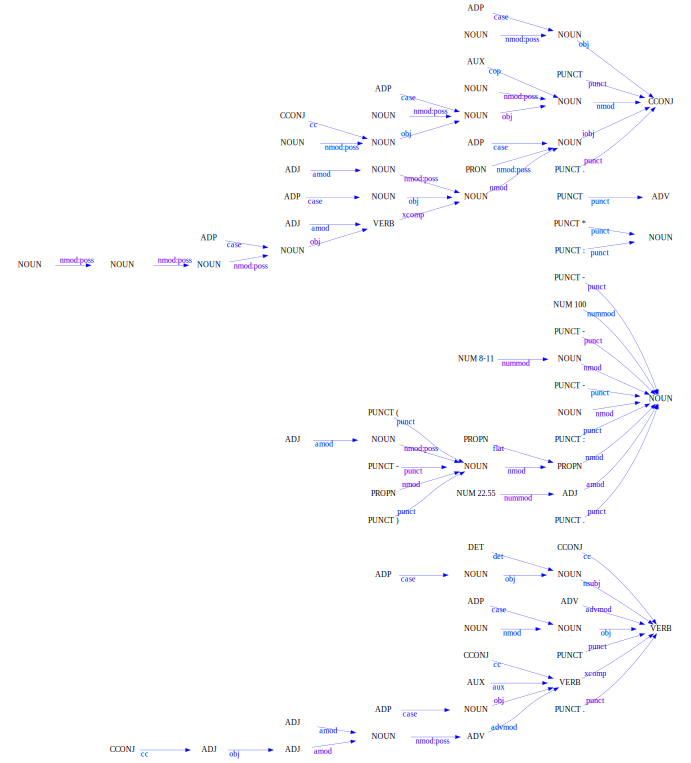

In [328]:
# draw tree
from graphviz import Digraph, nohtml

def _tree_draw(g, sent_id, node):
    id_self = f"{sent_id}|{node.token['id']}"
    id_head = f"{sent_id}|{node.token['head']}"
    g.node(id_self, nohtml(f"{node.token['upos']} {node.token}"))
    if not id_head.endswith('|0'):
        g.edge(id_head, id_self, headlabel=node.token['deprel'])
    for ch in node.children:
        _tree_draw(g, sent_id, ch)

def tree_draw(sentences):
    g = Digraph('G', filename='btree.gv',
                graph_attr={'rankdir': 'RL'},
                node_attr={'fontsize': '8', 'shape': 'plain', 'height': '0'},
                edge_attr={'fontsize': '8', 'fontcolor': 'blue', 'color': 'blue', 'arrowsize': '.5', 'dir': 'back', 'penwidth': '.25'})
    for sentence in reversed(sentences):
        print(sentence.metadata['text'])
    for sentence in sentences:
        sent_id = sentence.metadata['sent_id'].replace(':', '#')
        with g.subgraph(name=sent_id) as c:
            c.attr(label="outside 1")
            _tree_draw(c, sent_id, sentence.to_tree())
    return g

import random
tree_draw(random.sample(dbg_corpus, 5))
# tree_draw([dbg_sentence])

In [4]:
from collections import defaultdict
import pandas as pd

dbg_stats = defaultdict(lambda: defaultdict(lambda: 0))
for sentence in dbg_corpus:
    for token in sentence:
        for k, v in token.items():
            if k in ['id', 'form', 'lemma', 'head', 'deps', 'misc'] or v is None:
                # ignore deps, misc
                continue
            if not isinstance(v, dict):
                if k == 'upos' and v == '_' and '-' in token['id']:
                    # this is a compound token (e.g. عندما)
                    break
                dbg_stats[k][v] += 1
            else:
                for k1, v1 in v.items():
                    dbg_stats[f"{k}__{k1}"][v1] += 1

pd.set_option('display.max_colwidth', None)
pd.DataFrame.from_dict({
    k: ', '.join([
        f"{k1}:{v1}"
        for k1, v1 in v.items()
    ])
    for k, v in dbg_stats.items()
}, orient='index')

0
upos                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

# 1. Regular Old Frequency Counting

In [5]:
# Find sentences with lawo_1 (لو)
lawo_sentences = [s for s in corpus_train if s.filter(lemma='lawo_1')]
pd.DataFrame([s.metadata['text'] for s in lawo_sentences])

,0
0,"وقالت ثروت معربس لفرانس برس "" فرحتي كبيرة . ماري ستطلق اليوم الذي يصادف عيد السيدة العذراء ، وسنحتفل ككل سنة بعيدها في لبنان ، حتى ولو تاخر ذلك يوما "" ."
1,"واضاف "" استطيع ان اؤكد الان بان المسؤولين عن الاشغال لديهم ما يكفي من التصميم والجدية لكي يعوضوا التأخير الحاصل حتى لو اقتضى الامر تأمين فرق اضافية تعمل 24 ساعة على 24 "" ."
2,"وكتبت صحيفة "" المدينة "" الحكومية ان "" الشعب العراقي يمتلك الكثير من الموارد التى لو سخرت بطريقة صحيحة لرفعت العناء عن العراقيين الصابرين ( ... ) لكن نازي بغداد لا يريد ذلك ويتاجر فى هذه اللحظة بأحزان أبناء دجلة والفرات باستمراره فى خرق قرارات الامم المتحدة وتجويعه لشعبه "" ."
3,موسكو 15-8 ( اف ب ) - كانت فرضية تفسير غرق الغواصة الروسية كورسك في بحر بارنتس نتيجة لانفجار الاكثر احتمالا اليوم الثلاثاء ولو ان السلطات لا تزال ترجح احتمال اصطدام الغواصة بسفينة اخرى .
4,"واضاف الشاب الذي قال انه عنصر سابق من ميليشيا جيش لبنان الجنوبي الموالية لاسرائيل "" ما هي الجرائم التي اقترفتها نساؤنا واطفالنا ليعيشوا حياة بائسة كلاجئين من بلد الى بلد . اننا نريد العودة الى لبنان حتى ولو كانوا سيلقون بنا في السجن لكننا نريد ضمانات لحياتنا "" ."
...,...
128,"ورفض رئيس محكمة الجنايات في سوهاج المستشار محمد عفيفي الأدلة التي قدمتها النيابة ضد المتهمين في قضية الكُشح . وبدا انه توقع ألا ترضي الأحكام بعض رموز الأقباط على أساس أن المصادمات التي وقعت في القرية بداية العام الماضي أسفرت عن مقتل 20 قبطياً ومسلما واحداً ، فاستبقهم بإدانة سلوك ثلاثة قساوسية من رعاة كنيسة سوهاج وردت اسماؤهم في التحقيقات "" وتقاعسوا عن تهدئة الأمور في القرية "" و "" كانوا محرضين على اثارةالمشاعر والغضب "" ، وقال : "" لو تعاون الثلاثة مع الشرطة لما تطورت الاحداث "" ، وطلب من قادة الكنيسة القبطية المصرية "" معاقبة القساوسة الثلاثة واتخاذ ما هو مسموح ضدهم "" ، لافتاً إلي أنه "" ليس من العدل أو الحكمة أن تسكب البنزين على النار ثم تتباكي "" ، وفي اشارة الى الحملة التي شنها بعض أقباط المهجر ضد الحكومة المصرية أثناء وبعد الاحداث قال : "" كان أولي بالذين استجاروا بأمريكا وكلينتون أن يستجيروا بمصر لأنها الأم التي لا تفرق بين ابنائها "" ."
129,"واكتفي شنوده بإعلان اعتراضه على الأحكام ورفض الحديث في تفاصيل القضية . ودفعت الضجة التي أحدثها إعلانه موقفه رئيس هيئة الكتاب الدكتور سمير سرحان الى التعليق بأن البابا "" أطلق قنبلة الندوة "" ، ورفض شنودة الإجابة عن سؤال عما إذا كان الاقباط المصريون يتعرضون للاضطهاد ، وطلب من سرحان الذي كان يدير الندوة الاجابة عن السؤال بنفسه ، فعلق الاخير بأن "" من حق البابا رفض الاجابة "" . ونفي شنوده في شدة أن يكون الاقباط المصريون يسعون إلي الحصول على مزايا أو حقوق سياسية ورفض الإفصاح عن عدد الأقباط في البلاد ، وداعب الحاضرين قائلا : "" مسألة عدد الأقباط لا تشغلنا لأننا لو فرغنا أنفسنا لعددهم سنتعب من طول الفترة التي تستلزم ذلك "" ."
130,"ثمة تطور آخر جدير بالانتباه وهو بداية تشكل موقف وطني عام يشارك فيه مسلمون وأقباط وعلمانيون ويتأسس على الانطلاق من نقطتين أساسيتين ، الأولى تتعلق بتشخيص أزمة الراهب المخلوع الأخيرة باعتبارها مشكلة "" وضع بين الكنيسة والدولة "" ـ وفق تعبير المفكر الإسلامي طارق البشري . فوفقاً لدراسات لمسلمين ولأقباط تصرفت الكنيسة منذ تولي البابا شنودة "" وكأن الدولة غير موجودة "" ـ على حد تعبير الرئيس السادات ـ أو كما لو كانت نداً لها ، ويبدو أن ذريعة الكنيسة المتمثلة في عدم تدخل أي مؤسسة في الشؤون الدينية للأقباط تتعرض للمراجعة في المجتمع المصري ومؤسساته . ففي قضية رفعها القمص أندرواس عزيز ضد البابا شنودة مطالباً بإلغاء قرار المجلس الإكليريكي بتجريده من درجة الكهنوتية قضت هيئة مفوضي الدولة برفض دفع الكنيسة بعدم اختصاص المحكمة الإدارية العليا ، ما يفتح الباب أمام ثورة متوقعة من الكهنة والرهبان المخلوعين ، وهو الأمر الذي سيكون له تأثير ملموس في هيبة السلطة الكنسية ومكانة القيادة الكارزمية ـ الروحية والسياسية ـ للبابا شنودة نفسه ."
131,إذا كان أسامة بن لادن وراء الإرهاب الأخير في الولايات المتحدة فهو هدف مشروع للتحالف الدولي ، ولكن حزب الله وحماس والجهاد الإسلامي ليست منظمات إرهابية ، بل حركات تحرر . وفي حين اعترضتُ دائماً على العمليات الانتحارية ، وسأظل أفعل ، فإن مقاومة هذه المنظمات الإسلامية الاحتلال الإسرائيلي بكل أشكاله عمل مشروع تماماً ويجب أن يحظى بدعم مستمر إلى أن تنسحب إسرائيل من الأراضي المحتلة كلها . ولو أن الولايات المتحدة أوقفت الإرهاب الإسرائيلي ، لانتهي الإرهاب المضاد من تلقاء نفسه ، فهو رد ف

واضاف " حتى لو استخدمت الولايات المتحدة هذا الاحتياطي ، فهناك كميات كافية من النفط في السوق . قلتها واكررها فالمشكلة ليست في النفط الخام وانما في المشتقات النفطية " .


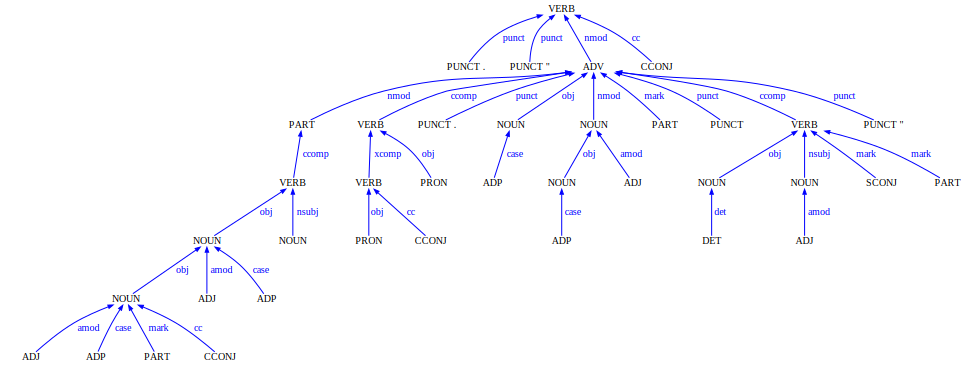

In [166]:
print(lawo_sentences[5].metadata['text'])
tree_draw(lawo_sentences[5].to_tree())

In [165]:
# Capture a window around lawo_1
def toke_find_by_id(sentence, id):
    tokens = sentence.filter(id=id)
    if len(tokens) == 0: return None
    if len(tokens) > 1: raise Exception(f"Duplicate tokens: {tokens}")
    return tokens[0]
    
def token_windows(sentence, token_lemma, window_size=(2, 2)):
    windows = []
    for lawo1 in sentence.filter(lemma=token_lemma):
        w = []
        lawo1_id = lawo1['id']
        i = 0
        while len(w) <= window_size[1]:
            w.append(toke_find_by_id(sentence, lawo1['id'] + i))
            i += 1
        i = 1
        while len(w) <= window_size[0] +  window_size[1]:
            w.insert(0, toke_find_by_id(sentence, lawo1['id'] - i))
            i += 1
        windows.append(w)
    return windows

print(dict_prettify(token_windows(sentence=lawo_sentences[5], token_lemma='lawo_1', window_size=(5, 0))))

[
  [
    null,
    {
      "id": 1,
      "form": "و",
      "lemma": "w",
      "upos": "CCONJ",
      "xpos": "CONJ",
      "feats": null,
      "head": 2,
      "deprel": "cc",
      "deps": null,
      "misc": {
        "bw": "wa"
      }
    },
    {
      "id": 2,
      "form": "اضاف",
      "lemma": ">aDAf_1",
      "upos": "VERB",
      "xpos": "PV+PVSUFF_SUBJ:3MS",
      "feats": {
        "Aspect": "Perf",
        "Gender": "Masc",
        "Mood": "Ind",
        "Number": "Sing",
        "Person": "3",
        "Voice": "Act"
      },
      "head": 0,
      "deprel": "root",
      "deps": null,
      "misc": {
        "bw": ">aDAfa"
      }
    },
    {
      "id": 3,
      "form": "\"",
      "lemma": "DEFAULT",
      "upos": "PUNCT",
      "xpos": "PUNC",
      "feats": null,
      "head": 13,
      "deprel": "punct",
      "deps": null,
      "misc": {
        "bw": "\""
      }
    },
    {
      "id": 4,
      "form": "حتى",
      "lemma": "Hat~aY_3",
      "upos": "PART

In [7]:
def token_get_prop(tokens, prop_name, prop_default='#'):
    return [
        t[prop_name]
        if t and prop_name in t
        else prop_default
        for t in tokens
    ]

def token_prop_windows(sentence, token_lemma, prop_name, prop_default, window_size=(2, 2)):
    ws = []
    for w in token_windows(sentence, token_lemma, window_size):
        # print('|'.join(token_get_prop(w, 'form', prop_default)))
        ws.append(token_get_prop(w, prop_name, prop_default))
    return ws

print(lawo_sentences[0].metadata['text'])
print(token_prop_windows(sentence=lawo_sentences[0], token_lemma='lawo_1', prop_name='upos', prop_default='#'))

print(lawo_sentences[5].metadata['text'])
print(token_prop_windows(sentence=lawo_sentences[5], token_lemma='lawo_1', prop_name='upos', prop_default='#', window_size=(5, 0)))

وقالت ثروت معربس لفرانس برس " فرحتي كبيرة . ماري ستطلق اليوم الذي يصادف عيد السيدة العذراء ، وسنحتفل ككل سنة بعيدها في لبنان ، حتى ولو تاخر ذلك يوما " .
[['CCONJ', 'SCONJ', 'VERB', 'DET', 'NOUN']]
واضاف " حتى لو استخدمت الولايات المتحدة هذا الاحتياطي ، فهناك كميات كافية من النفط في السوق . قلتها واكررها فالمشكلة ليست في النفط الخام وانما في المشتقات النفطية " .
[['#', 'CCONJ', 'VERB', 'PUNCT', 'PART', 'SCONJ']]


In [8]:
window_size=(0, 2)
stats = defaultdict(lambda: 0)
for s in lawo_sentences:
    # print(s.metadata['sent_id'])
    for w in token_prop_windows(sentence=s, token_lemma='lawo_1', prop_name='upos', prop_default='#', window_size=window_size):
        stats['>'.join(w[1:])] += 1
sorted([(v, k) for k, v in stats.items()])

[(1, 'AUX>ADP'),
 (1, 'AUX>AUX'),
 (1, 'AUX>PROPN'),
 (1, 'AUX>VERB'),
 (1, 'DET>NOUN'),
 (1, 'NOUN>ADP'),
 (1, 'NOUN>VERB'),
 (1, 'NUM>ADV'),
 (1, 'SCONJ>PROPN'),
 (1, 'VERB>PUNCT'),
 (1, 'VERB>SCONJ'),
 (2, 'ADJ>PUNCT'),
 (2, 'AUX>ADV'),
 (2, 'AUX>PUNCT'),
 (2, 'NOUN>ADJ'),
 (2, 'VERB>CCONJ'),
 (3, 'ADJ>ADP'),
 (3, 'ADV>NOUN'),
 (3, 'AUX>ADJ'),
 (3, 'AUX>DET'),
 (3, 'VERB>DET'),
 (3, 'VERB>PRON'),
 (3, 'VERB>PROPN'),
 (4, 'ADV>AUX'),
 (4, 'SCONJ>NOUN'),
 (5, 'SCONJ>PRON'),
 (8, 'ADV>VERB'),
 (12, 'AUX>NOUN'),
 (15, 'VERB>ADP'),
 (21, 'ADP>NOUN'),
 (25, 'VERB>NOUN')]